<a href="https://colab.research.google.com/github/shwbak/HAI-Anomaly-Detection/blob/main/%EC%96%91%EB%B0%A9%ED%96%A5LSTM%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SSH 키 발급

In [3]:
!ssh-keygen

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
/root/.ssh/id_rsa already exists.
Overwrite (y/n)? 


In [4]:
%cd ~/.ssh/

/root/.ssh


In [5]:
! cat id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAABgQDaOlx+XmJq1bd51RDdkN3GymKkPJIHIBbpwptrBd509s2GzjPOpCFVdu8a+He3qXuu23pat4/ALx+2nEJXHbngxqCXUOqf6lyvP1hl1XTvqstGXf9L/UNKrJzh1mcMdkdz22duUUdzrRqTEhs4Ga+jSBOIyYLrrxYKHmihldhw0W6OTk3AHzI31b5ntp4F4q7ygWYER+7hyBkazwjMLB5wE2te+7ad9p4gRmVFdTtPxAt8nXZq3KYnVUqUHPwaogCIpJEbZsJgwz44EEj7ub4e5Io+/zbwqa+XiVmDtV2ptG3J5g2dkUJ/cuVjKQAf6dE35QzgtDIcCP/FKpX7uDvWE4BCJyIfvRYTv8odfidKs4qxkCFPK0eYl7eI5Cy6c76GY1ApNDxD6TjgLhYNXbmf9w6a/0CW4BXjVHxlUrwsW9U1u7j2ooZHc7/qvzyqXGzTn2e8Tt6kh/dw/dYJ/SPMEj5B4ToUsYW+xzkayh47q2TrSPuTdFp0RCkg/Pvvxks= root@1fef93d48713


# Git 연동 확인

In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

/bin/bash: /root/.ssh/known_hosts: No such file or directory


In [ ]:
!ssh -T git@github.com

Host key verification failed.


#구글드라이브 마운트

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Github Origin을 Pull

In [7]:
from os.path import join
from os import makedirs

PROJ_path = "/content/drive/MyDrive/Colab Notebooks/"
%cd "{PROJ_path}"
try:
  makedirs("HAI-Anomaly-Detection")
  REPO_path = "/content/drive/MyDrive/Colab Notebooks/HAI-Anomaly-Detection/"
  %cd "{REPO_path}"
  !git init
  !git config --global user.email "minseok4864@ajou.ac.kr"
  !git config --global user.name "minseok4864"
  !git remote add origin https://github.com/shwbak/HAI-Anomaly-Detection

  !pip install --upgrade git-lfs

  !git lfs install
  !git lfs track "*.csv"
  !git add .gitattributes
except:
  print("동일한 이름의 폴더가 이미 존재합니다.")

/content/drive/MyDrive/Colab Notebooks
동일한 이름의 폴더가 이미 존재합니다.


Pull 코드

In [ ]:
REPO_path = "/content/drive/MyDrive/Colab Notebooks/HAI-Anomaly-Detection/"
%cd "{REPO_path}"

!pip install --upgrade git-lfs

!git init
!git config --global user.email "minseok4864@ajou.ac.kr"
!git config --global user.name "minseok4864"
!git pull origin main

/content/drive/MyDrive/Colab Notebooks/HAI-Anomaly-Detection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reinitialized existing Git repository in /content/drive/MyDrive/Colab Notebooks/HAI-Anomaly-Detection/.git/
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), 3.59 KiB | 1024 bytes/s, done.
From https://github.com/shwbak/HAI-Anomaly-Detection
 * branch            main       -> FETCH_HEAD
   849cca1..3a7da8b  main       -> origin/main
Updating 849cca1..3a7da8b
Fast-forward
 ...54\232\251\355\225\234_Anomaly_Detection.ipynb" | 311 ++++++++-------------
 1 file changed, 115 insertions(+), 196 deletions(-)
fatal: cannot exec '.git/hooks/post-merge': Permission denied


#소스코드

In [8]:
REPO_path = "/content/drive/MyDrive/Colab Notebooks/HAI-Anomaly-Detection/"
%cd "{REPO_path}"
!pip install eTaPR-21.8.2-py3-none-any.whl

/content/drive/MyDrive/Colab Notebooks/HAI-Anomaly-Detection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./eTaPR-21.8.2-py3-none-any.whl
eTaPR is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model, Sequential, load_model
from keras.layers import Input,Bidirectional ,LSTM, Dense, Activation, GRU

import tensorflow as tf

from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
from pathlib import Path
from datetime import timedelta

import dateutil
import matplotlib.pyplot as plt
from tqdm.notebook import trange
from TaPR_pkg import etapr

def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)
    
def plot_history(history):
    losses = [x['val_loss'] for x in history]
    plt.plot(losses, '-x', label="loss")
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.title('Losses vs. No. of epochs')
    plt.grid()
    plt.show()

In [10]:
import torch.nn as nn

device = get_default_device()


class Autoencoder(nn.Module):
    def __init__(self, in_size, latent_size):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(in_size, int(in_size/2)),
            nn.ReLU(True),
            nn.Linear(int(in_size/2), int(in_size/4)),
            nn.ReLU(True),
            nn.Linear(int(in_size/4), latent_size),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, int(in_size/4)),
            nn.ReLU(True),
            nn.Linear(int(in_size/4), int(in_size/2)),
            nn.ReLU(True),
            nn.Linear(int(in_size/2), in_size),
            nn.Sigmoid()
        )
  
    def training_step(self, batch, epoch):
        z = self.encoder(batch)
        out = self.decoder(z)
        loss1 = nn.MSELoss()(out, batch)
        loss2 = nn.L1Loss()(out, batch)
        return loss1, loss2

    def validation_step(self, batch, epoch):
        z = self.encoder(batch)
        out = self.decoder(z)
        loss = nn.MSELoss()(out, batch)
        return {'val_loss': loss}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        return {'val_loss': epoch_loss.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}".format(epoch, result['val_loss']))


def evaluate(model, val_loader, epoch):
    outputs = [model.validation_step(to_device(batch, device), epoch) for [batch] in val_loader]
    return model.validation_epoch_end(outputs)

def training(epochs, model, train_loader, val_loader, opt_func=torch.optim.AdamW):
    history = []
    optimizer = opt_func(list(model.encoder.parameters()) + list(model.decoder.parameters()))
    for epoch in range(epochs):
        for [batch] in train_loader:
            batch = to_device(batch, device)
            loss1, loss2 = model.training_step(batch, epoch+1)
            loss1.backward()
            optimizer.step()
            optimizer.zero_grad()
        result = evaluate(model, val_loader, epoch + 1)
        model.epoch_end(epoch, result)
        history.append(result)
    return history


def testing(model, test_loader):
    results = []
    for [batch] in test_loader:
        batch = to_device(batch, device)
        z = model.encoder(batch)
        reconstructed = model.decoder(z)
        results.append(torch.mean((batch - reconstructed)**2, axis=1))
    return results

In [11]:
import sys

from pathlib import Path
from datetime import timedelta

import dateutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import trange
from TaPR_pkg import etapr
from tqdm import tqdm

In [12]:
def dataframe_from_csv(target):
    return pd.read_csv(target).rename(columns=lambda x: x.strip())

def dataframe_from_csvs(targets):
    return pd.concat([dataframe_from_csv(x) for x in targets])

In [13]:
TRAIN_DATASET = sorted([x for x in Path("/content/drive/MyDrive/Colab Notebooks/HAI-Anomaly-Detection/HAICon2021_dataset/train/").glob("*.csv")])
TEST_DATASET = sorted([x for x in Path("/content/drive/MyDrive/Colab Notebooks/HAI-Anomaly-Detection/HAICon2021_dataset/test/").glob("*.csv")])
VALIDATION_DATASET = sorted([x for x in Path("/content/drive/MyDrive/Colab Notebooks/HAI-Anomaly-Detection/HAICon2021_dataset/validation/").glob("*.csv")])

In [14]:
TRAIN_DF_RAW = dataframe_from_csvs(TRAIN_DATASET)
TRAIN_DF_RAW.reset_index(drop=True,inplace=True)

In [13]:
TRAIN_DF_RAW_01 = dataframe_from_csv(TRAIN_DATASET[0])
TRAIN_DF_RAW_01.reset_index(drop=True,inplace=True)

TRAIN_DF_RAW_02 = dataframe_from_csv(TRAIN_DATASET[1])
TRAIN_DF_RAW_02.reset_index(drop=True,inplace=True)

TRAIN_DF_RAW_03 = dataframe_from_csv(TRAIN_DATASET[2])
TRAIN_DF_RAW_03.reset_index(drop=True,inplace=True)

TRAIN_DF_RAW_04 = dataframe_from_csv(TRAIN_DATASET[3])
TRAIN_DF_RAW_04.reset_index(drop=True,inplace=True)

TRAIN_DF_RAW_05 = dataframe_from_csv(TRAIN_DATASET[4])
TRAIN_DF_RAW_05.reset_index(drop=True,inplace=True)

TRAIN_DF_RAW_06 = dataframe_from_csv(TRAIN_DATASET[5])
TRAIN_DF_RAW_06.reset_index(drop=True,inplace=True)

print(TRAIN_DF_RAW.shape)
TRAIN_DF_RAW.head()

(1004402, 87)


,timestamp,C01,C02,C03,C04,C05,C06,C07,C08,C09,...,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86
0,2021-07-11 10:00:00,-2.2642,0,12.26196,-0.00087,12.01019,0.2254,12.66931,70,1,...,0.92255,30.08042,7.08818,595.06104,276.40338,1,1014.79321,12.0,50,3506
1,2021-07-11 10:00:01,-2.4923,0,12.26196,0.00058,12.56714,-0.0711,12.66931,70,1,...,0.92255,30.08423,7.08818,531.50317,276.18634,1,1014.79321,12.0,50,3493
2,2021-07-11 10:00:02,-2.8460,0,12.26196,-0.00072,14.48975,0.0051,12.66931,70,1,...,0.91873,30.09148,7.08818,451.06253,279.85754,1,1014.79321,12.0,50,3490
3,2021-07-11 10:00:03,-2.1235,0,12.26196,0.00101,15.93170,0.1842,12.66931,70,1,...,0.91644,30.10407,7.08818,404.38739,281.50317,1,1014.79321,12.0,50,3525
4,2021-07-11 10:00:04,-2.9074,0,12.26196,0.00043,16.10718,0.1842,12.66931,70,1,...,0.91797,30.10331,7.08818,382.53925,281.34039,1,1014.79321,12.0,50,3503


아래 두 목록에는 중복된 장치들이 있으니 이 점 유의하시면 좋을 것 같습니다.

변화가 없는 장치 목록
- C22, C52, C63, C82, C85, C55, C36, C26, C49, C38, C39, C29, C18, C19, C09

범주형 데이터 형태인 장치 목록
- C02, C07, C08, C09, C10, C17, C18, C19, C22, C26, C29, C34, C35, C36, C38, C39, C46, C48, C49, C52, C55, C58, C61, C63, C64, C69, C79, C82, C85

예측의 Loss 값이 튀는 경우를 없애주기 위해서 범주형 데이터의 경우 제외시켜주었습니다.

하지만 유의미한 결과를 보지는 못했던 것 같습니다.

In [15]:
TIMESTAMP_FIELD = "timestamp"
DROP_FIELD = ["C02", "C07", "C08", "C09", "C10", "C17", "C18", "C19", "C22", "C26", "C29", "C34", "C35", "C36", "C38", "C39", "C46", "C48", "C49", "C52", "C55", "C58", "C61", "C63", "C64", "C69", "C79", "C82", "C85"]
IDSTAMP_FIELD = 'id'
ATTACK_FIELD = "attack"
VALID_COLUMNS_IN_TRAIN_DATASET = TRAIN_DF_RAW.columns.drop([TIMESTAMP_FIELD])
VALID_COLUMNS_IN_TRAIN_DATASET = VALID_COLUMNS_IN_TRAIN_DATASET.drop(DROP_FIELD)
VALID_COLUMNS_IN_TRAIN_DATASET

Index(['C01', 'C03', 'C04', 'C05', 'C06', 'C11', 'C12', 'C13', 'C14', 'C15',
       'C16', 'C20', 'C21', 'C23', 'C24', 'C25', 'C27', 'C28', 'C30', 'C31',
       'C32', 'C33', 'C37', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C47',
       'C50', 'C51', 'C53', 'C54', 'C56', 'C57', 'C59', 'C60', 'C62', 'C65',
       'C66', 'C67', 'C68', 'C70', 'C71', 'C72', 'C73', 'C74', 'C75', 'C76',
       'C77', 'C78', 'C80', 'C81', 'C83', 'C84', 'C86'],
      dtype='object')

In [16]:
TAG_MIN = TRAIN_DF_RAW[VALID_COLUMNS_IN_TRAIN_DATASET].min()
TAG_MAX = TRAIN_DF_RAW[VALID_COLUMNS_IN_TRAIN_DATASET].max()

In [17]:
def normalize(df):
    ndf = df.copy()
    for c in df.columns:
        if TAG_MIN[c] == TAG_MAX[c]:
            ndf[c] = df[c] - TAG_MIN[c]
        else:
            ndf[c] = (df[c] - TAG_MIN[c]) / (TAG_MAX[c] - TAG_MIN[c])
    return ndf

In [18]:
# TRAIN_DF_01 = normalize(TRAIN_DF_RAW_01[VALID_COLUMNS_IN_TRAIN_DATASET]).ewm(alpha=0.9).mean()
# TRAIN_DF_02 = normalize(TRAIN_DF_RAW_02[VALID_COLUMNS_IN_TRAIN_DATASET]).ewm(alpha=0.9).mean()
# TRAIN_DF_03 = normalize(TRAIN_DF_RAW_03[VALID_COLUMNS_IN_TRAIN_DATASET]).ewm(alpha=0.9).mean()
# TRAIN_DF_04 = normalize(TRAIN_DF_RAW_04[VALID_COLUMNS_IN_TRAIN_DATASET]).ewm(alpha=0.9).mean()
# TRAIN_DF_05 = normalize(TRAIN_DF_RAW_05[VALID_COLUMNS_IN_TRAIN_DATASET]).ewm(alpha=0.9).mean()
# TRAIN_DF_06 = normalize(TRAIN_DF_RAW_06[VALID_COLUMNS_IN_TRAIN_DATASET]).ewm(alpha=0.9).mean()

In [19]:
def boundary_check(df):
    x = np.array(df, dtype=np.float32)
    return np.any(x > 1.0), np.any(x < 0), np.any(np.isnan(x))

#LSTM 모델

In [23]:
def HaiDataset(timestamps, df, stride=1, attacks=None):
    ts= np.array(timestamps)
    tag_values=np.array(df,dtype=np.float32)
    valid_idxs=[]
    for L in trange(len(ts)-WINDOW_SIZE+1):
        R = L + WINDOW_SIZE - 1
        if dateutil.parser.parse(ts[R]) - dateutil.parser.parse(ts[L]) == timedelta(seconds=WINDOW_SIZE - 1):
            valid_idxs.append(L)
    valid_idxs=np.array(valid_idxs, dtype=np.int32)[::stride]
    n_idxs = len(valid_idxs)
    print("# of valid windows:", n_idxs)
    if attacks is not None:
        attacks = np.array(attacks, dtype=np.float32)
        with_attack = True
    else:
        with_attack = False
        
    
    timestamp, X, y, att = list(), list(), list(), list()
    
    if with_attack:
        for i in valid_idxs:
            last=i+WINDOW_SIZE-1
            seq_time, seq_x, seq_y, seq_attack = ts[last], tag_values[i:i+WINDOW_GIVEN], tag_values[last], attacks[last]
            timestamp.append(seq_time)
            X.append(seq_x)
            y.append(seq_y)
            att.append(seq_attack)
            
        return np.array(timestamp), np.array(X), np.array(y), np.array(att)
    else:
        for i in valid_idxs:
            last=i+WINDOW_SIZE-1
            seq_time, seq_x, seq_y = ts[last], tag_values[i:i+WINDOW_GIVEN], tag_values[last]
            timestamp.append(seq_time)
            X.append(seq_x)
            y.append(seq_y)
        return np.array(timestamp), np.array(X), np.array(y)

In [20]:
VALIDATION_DF_RAW = dataframe_from_csvs(VALIDATION_DATASET)
TEST_DF_RAW = dataframe_from_csvs(TEST_DATASET)

In [21]:
TRAIN_DF = normalize(TRAIN_DF_RAW[VALID_COLUMNS_IN_TRAIN_DATASET]).ewm(alpha=0.9).mean()
TEST_DF = normalize(TEST_DF_RAW[VALID_COLUMNS_IN_TRAIN_DATASET]).ewm(alpha=0.9).mean()
VALIDATION_DF = normalize(VALIDATION_DF_RAW[VALID_COLUMNS_IN_TRAIN_DATASET]).ewm(alpha=0.9).mean()

In [24]:
## 35seq, 10seq, 50seq 학습 모델 생성
# 기본 모델은 35seq
# 10seq, 50seq는 추후 사용

WINDOW_SIZE= 35
WINDOW_GIVEN = WINDOW_SIZE - 1

ts, X_train, y_train = HaiDataset(TRAIN_DF_RAW[TIMESTAMP_FIELD], TRAIN_DF, stride=1)
ts, X_valid, y_valid, attack = HaiDataset(VALIDATION_DF_RAW[TIMESTAMP_FIELD], VALIDATION_DF, attacks=VALIDATION_DF_RAW[ATTACK_FIELD])

aux_train=[]
for i in range(len(X_train)):
    aux_train.append(X_train[i][0])
aux_train=np.array(aux_train)

aux_valid=[]
for i in range(len(X_valid)):
    aux_valid.append(X_valid[i][0])
aux_valid=np.array(aux_valid)

  0%|          | 0/1004368 [00:00<?, ?it/s]

# of valid windows: 1004198


  0%|          | 0/86366 [00:00<?, ?it/s]

# of valid windows: 86366


In [26]:
# 딥러닝 학습 및 추론에는 Keras를 사용
# 과적합 방지 적용
ModelName = './LSTM_35seq_test.h5'

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint(ModelName, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [25]:
## LSTM Model define

# 3층 양방향 LSTM 사용
# Hidden cell = 100
# Dropout 미사용
# Skip connection 사용

n_features = TRAIN_DF.shape[1]

inputs=Input(shape=(WINDOW_GIVEN , n_features))
first=Bidirectional(LSTM(100, return_sequences=True))(inputs)
second=Bidirectional(LSTM(100, return_sequences=True))(first)
third=Bidirectional(LSTM(100))(second)

lstm_out=Dense(n_features)(third)

aux_input = Input(shape=(n_features,), name='aux_input')
outputs = keras.layers.add([lstm_out, aux_input])
model=Model(inputs=[inputs, aux_input], outputs=outputs)

model.compile(loss='mean_squared_error', optimizer='Adam')

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 34, 57)]     0           []                               
                                                                                                  
 bidirectional (Bidirectional)  (None, 34, 200)      126400      ['input_1[0][0]']                
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 34, 200)     240800      ['bidirectional[0][0]']          
 )                                                                                                
                                                                                                  
 bidirectional_2 (Bidirectional  (None, 200)         240800      ['bidirectional_1[0][0]']    

In [26]:
hist=model.fit([X_train, aux_train], y_train, batch_size=512, epochs=32, shuffle=True, 
               callbacks=[es, mc], validation_data=([X_valid,aux_valid],y_valid))

plt.figure(figsize=(16, 4))
plt.title("Training Loss Graph")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.yscale("log")
plt.plot(hist.history['loss'])
plt.show()

Epoch 1/32
1961/1962 [============================>.] - ETA: 0s - loss: 0.0013
Epoch 1: val_loss improved from inf to 0.00103, saving model to ./LSTM_35seq_test.h5
1962/1962 [==============================] - 102s 44ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 2/32
1961/1962 [============================>.] - ETA: 0s - loss: 4.9565e-04
Epoch 2: val_loss improved from 0.00103 to 0.00087, saving model to ./LSTM_35seq_test.h5
1962/1962 [==============================] - 83s 42ms/step - loss: 4.9563e-04 - val_loss: 8.6884e-04
Epoch 3/32
1961/1962 [============================>.] - ETA: 0s - loss: 3.9538e-04
Epoch 3: val_loss improved from 0.00087 to 0.00070, saving model to ./LSTM_35seq_test.h5
1962/1962 [==============================] - 83s 42ms/step - loss: 3.9537e-04 - val_loss: 7.0098e-04
Epoch 4/32
1961/1962 [============================>.] - ETA: 0s - loss: 3.4537e-04
Epoch 4: val_loss did not improve from 0.00070
1962/1962 [==============================] - 82s 42ms/step - loss:

KeyboardInterrupt: ignored

In [30]:
plot_history(hist)

NameError: ignored

In [ ]:
model.save()

print("--- Complete ---")

In [27]:
## model load

WINDOW_SIZE= 35
WINDOW_GIVEN = WINDOW_SIZE - 1

model = load_model('./LSTM_35seq_test.h5')
print(ModelName + " load")

# 예측값 산출
y_pred=model.predict([X_valid,aux_valid])

./LSTM_35seq_test.h5 load
2699/2699 [==============================] - 22s 6ms/step


In [28]:
# 검증 데이터셋 전체 시간대에 해당하는 모든 필드의 (예측값 - 실제값)
tmp=[]
for i in range(len(y_pred)):
    tmp.append(abs(y_valid[i]-y_pred[i]))
    
    
ANOMALY_SCORE=np.mean(tmp,axis=1)

In [29]:
print(ANOMALY_SCORE)

[0.01404024 0.01353723 0.01589815 ... 0.00688749 0.00613904 0.00591453]


In [46]:
THRESHOLD = 0.023

In [47]:
def put_labels(distance, threshold):
    xs = np.zeros_like(distance)
    xs[distance > threshold] = 1
    return xs

In [48]:
LABELS = put_labels(ANOMALY_SCORE, THRESHOLD)
LABELS, LABELS.shape

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), (86366,))

In [49]:
labels = [int(label!= 0 ) for label in VALIDATION_DF_RAW["attack"].values]

In [50]:
TaPR = etapr.evaluate_haicon(anomalies=labels, predictions=LABELS)
print(f"F1: {TaPR['f1']:.3f} (TaP: {TaPR['TaP']:.3f}, TaR: {TaPR['TaR']:.3f})")
print(f"# of detected anomalies: {len(TaPR['Detected_Anomalies'])}")
print(f"Detected anomalies: {TaPR['Detected_Anomalies']}")

F1: 0.093 (TaP: 0.056, TaR: 0.272)
# of detected anomalies: 4
Detected anomalies: [<TaPR_pkg.DataManage.Range.Range object at 0x7fb41415eb30>, <TaPR_pkg.DataManage.Range.Range object at 0x7fb415060a00>, <TaPR_pkg.DataManage.Range.Range object at 0x7fb4150171f0>, <TaPR_pkg.DataManage.Range.Range object at 0x7fb415017310>]


In [ ]:
window_size=12

windows_normal_01 = TRAIN_DF_01.values[np.arange(window_size)[None, :] + np.arange(TRAIN_DF_01.shape[0]-window_size)[:, None]]
windows_normal_02 = TRAIN_DF_02.values[np.arange(window_size)[None, :] + np.arange(TRAIN_DF_02.shape[0]-window_size)[:, None]]
windows_normal_03 = TRAIN_DF_03.values[np.arange(window_size)[None, :] + np.arange(TRAIN_DF_03.shape[0]-window_size)[:, None]]
windows_normal_04 = TRAIN_DF_04.values[np.arange(window_size)[None, :] + np.arange(TRAIN_DF_04.shape[0]-window_size)[:, None]]
windows_normal_05 = TRAIN_DF_05.values[np.arange(window_size)[None, :] + np.arange(TRAIN_DF_05.shape[0]-window_size)[:, None]]
windows_normal_06 = TRAIN_DF_06.values[np.arange(window_size)[None, :] + np.arange(TRAIN_DF_06.shape[0]-window_size)[:, None]]

In [ ]:
import torch.utils.data as data_utils

BATCH_SIZE =  7919
N_EPOCHS = 100
hidden_size = 100

w_size=windows_normal_01.shape[1]*windows_normal_01.shape[2]
z_size=windows_normal_01.shape[1]*hidden_size

train_loader_01 = data_utils.TensorDataset(torch.from_numpy(windows_normal_01).float().view(([windows_normal_01.shape[0],w_size])))
train_loader_02 = data_utils.TensorDataset(torch.from_numpy(windows_normal_02).float().view(([windows_normal_02.shape[0],w_size])))
train_loader_03 = data_utils.TensorDataset(torch.from_numpy(windows_normal_03).float().view(([windows_normal_03.shape[0],w_size])))
train_loader_04 = data_utils.TensorDataset(torch.from_numpy(windows_normal_04).float().view(([windows_normal_04.shape[0],w_size])))
train_loader_05 = data_utils.TensorDataset(torch.from_numpy(windows_normal_05).float().view(([windows_normal_05.shape[0],w_size])))

val_loader_01 = data_utils.TensorDataset(torch.from_numpy(windows_normal_06).float().view(([windows_normal_06.shape[0],w_size])))

train_loader = torch.utils.data.DataLoader(data_utils.ConcatDataset(
    [train_loader_01, train_loader_02, train_loader_03, train_loader_04, train_loader_05]
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

val_loader = torch.utils.data.DataLoader(val_loader_01, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

In [ ]:
model = Autoencoder(w_size, z_size)
model = to_device(model,device)

In [ ]:
model

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=684, out_features=342, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=342, out_features=171, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=171, out_features=1200, bias=True)
    (5): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1200, out_features=171, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=171, out_features=342, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=342, out_features=684, bias=True)
    (5): Sigmoid()
  )
)

In [ ]:
history = training(N_EPOCHS,model,train_loader,val_loader)

Epoch [0], val_loss: 0.0303
Epoch [1], val_loss: 0.0263
Epoch [2], val_loss: 0.0251
Epoch [3], val_loss: 0.0251
Epoch [4], val_loss: 0.0245
Epoch [5], val_loss: 0.0246
Epoch [6], val_loss: 0.0243
Epoch [7], val_loss: 0.0243
Epoch [8], val_loss: 0.0242
Epoch [9], val_loss: 0.0241
Epoch [10], val_loss: 0.0238
Epoch [11], val_loss: 0.0238
Epoch [12], val_loss: 0.0194
Epoch [13], val_loss: 0.0168
Epoch [14], val_loss: 0.0168
Epoch [15], val_loss: 0.0168
Epoch [16], val_loss: 0.0173
Epoch [17], val_loss: 0.0167
Epoch [18], val_loss: 0.0165
Epoch [19], val_loss: 0.0163
Epoch [20], val_loss: 0.0163
Epoch [21], val_loss: 0.0162
Epoch [22], val_loss: 0.0163
Epoch [23], val_loss: 0.0162
Epoch [24], val_loss: 0.0161
Epoch [25], val_loss: 0.0162
Epoch [26], val_loss: 0.0161
Epoch [27], val_loss: 0.0162
Epoch [28], val_loss: 0.0170
Epoch [29], val_loss: 0.0163
Epoch [30], val_loss: 0.0160
Epoch [31], val_loss: 0.0161
Epoch [32], val_loss: 0.0160
Epoch [33], val_loss: 0.0158
Epoch [34], val_loss: 0.

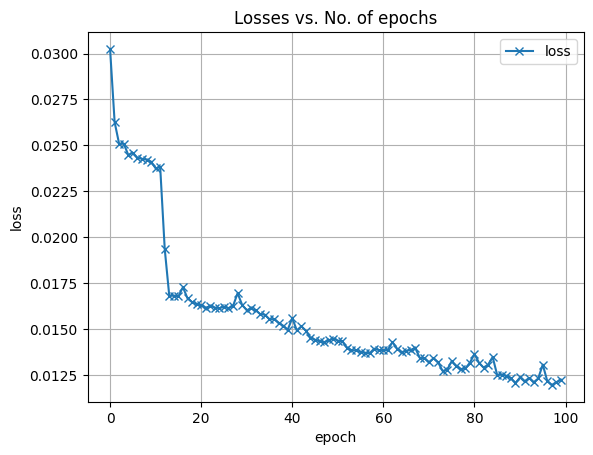

In [ ]:
plot_history(history)

In [ ]:
from os.path import join
from os import makedirs

%cd "{REPO_path}"
try:
  makedirs("models")
except:
  print("동일한 이름의 폴더가 이미 존재합니다.")

/content/drive/MyDrive/Colab Notebooks/HAI-Anomaly-Detection


In [ ]:
torch.save({
            'encoder': model.encoder.state_dict(),
            'decoder': model.decoder.state_dict()
            }, "./models/usad.pth")

In [ ]:
checkpoint = torch.load("./models/usad.pth")

model.encoder.load_state_dict(checkpoint['encoder'])
model.decoder.load_state_dict(checkpoint['decoder'])

<All keys matched successfully>

In [ ]:
VALIDATION_DF_RAW = dataframe_from_csv(VALIDATION_DATASET[0])
VALIDATION_DF_RAW.reset_index(drop=True,inplace=True)

In [ ]:
VALIDATION_DF = normalize(VALIDATION_DF_RAW[VALID_COLUMNS_IN_TRAIN_DATASET]).ewm(alpha=0.9).mean()

다양한 모델을 사용하였습니다만, Train Set을 기준으로 Min-Max Normalize를 진행한 뒤, Validation Set과 Test Set에 대해 Train Dataset의 Min값 혹은 Max값을 넘어가는 값에 x2, x1.5를 해주었을 경우 성능이 소폭 향상되는 모습을 보여주었습니다.

Min-Max Normalization이 어느정도 Anomaly Detection에서 효과를 보여준다는 걸 보여주는 것으로도 볼 수 있고, 값이 튀는 장치들에 실제로도 보안위협이 들어왔다고 생각할 수도 있을 것 같습니다.

In [ ]:
for i in tqdm(range(VALIDATION_DF.shape[0])):
    for j in range(VALIDATION_DF.shape[1]):
        if VALIDATION_DF.iloc[i, j] < 0:
            VALIDATION_DF.iloc[i, j] = VALIDATION_DF.iloc[i, j] * 2
        elif VALIDATION_DF.iloc[i, j] > 1:
            VALIDATION_DF.iloc[i, j] = VALIDATION_DF.iloc[i, j] * 2

100%|██████████| 86400/86400 [03:19<00:00, 432.07it/s]


In [ ]:
val = VALIDATION_DF.values[np.arange(window_size)[None, :] + np.arange(VALIDATION_DF.shape[0]-window_size)[:, None]]

In [ ]:
test_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(val).float().view(([val.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

In [ ]:
results = testing(model,test_loader)

In [ ]:
labels = [int(label!= 0 ) for label in VALIDATION_DF_RAW["attack"].values]

In [ ]:
y_pred = np.concatenate([torch.stack(results[:-1]).flatten().detach().cpu().numpy(),
                              results[-1].flatten().detach().cpu().numpy()])

In [ ]:
def check_graph(xs, att, piece=2, THRESHOLD=None):
    l = xs.shape[0]
    chunk = l // piece
    fig, axs = plt.subplots(piece, figsize=(20, 4 * piece))
    for i in range(piece):
        L = i * chunk
        R = min(L + chunk, l)
        xticks = range(L, R)
        axs[i].plot(xticks, xs[L:R])
        if len(xs[L:R]) > 0:
            peak = np.max(xs[L:R])
            axs[i].plot(xticks, att[L:R] * np.array(peak) * np.array(0.3))
        if THRESHOLD!=None:
            axs[i].axhline(y=THRESHOLD, color='r')
    plt.show()

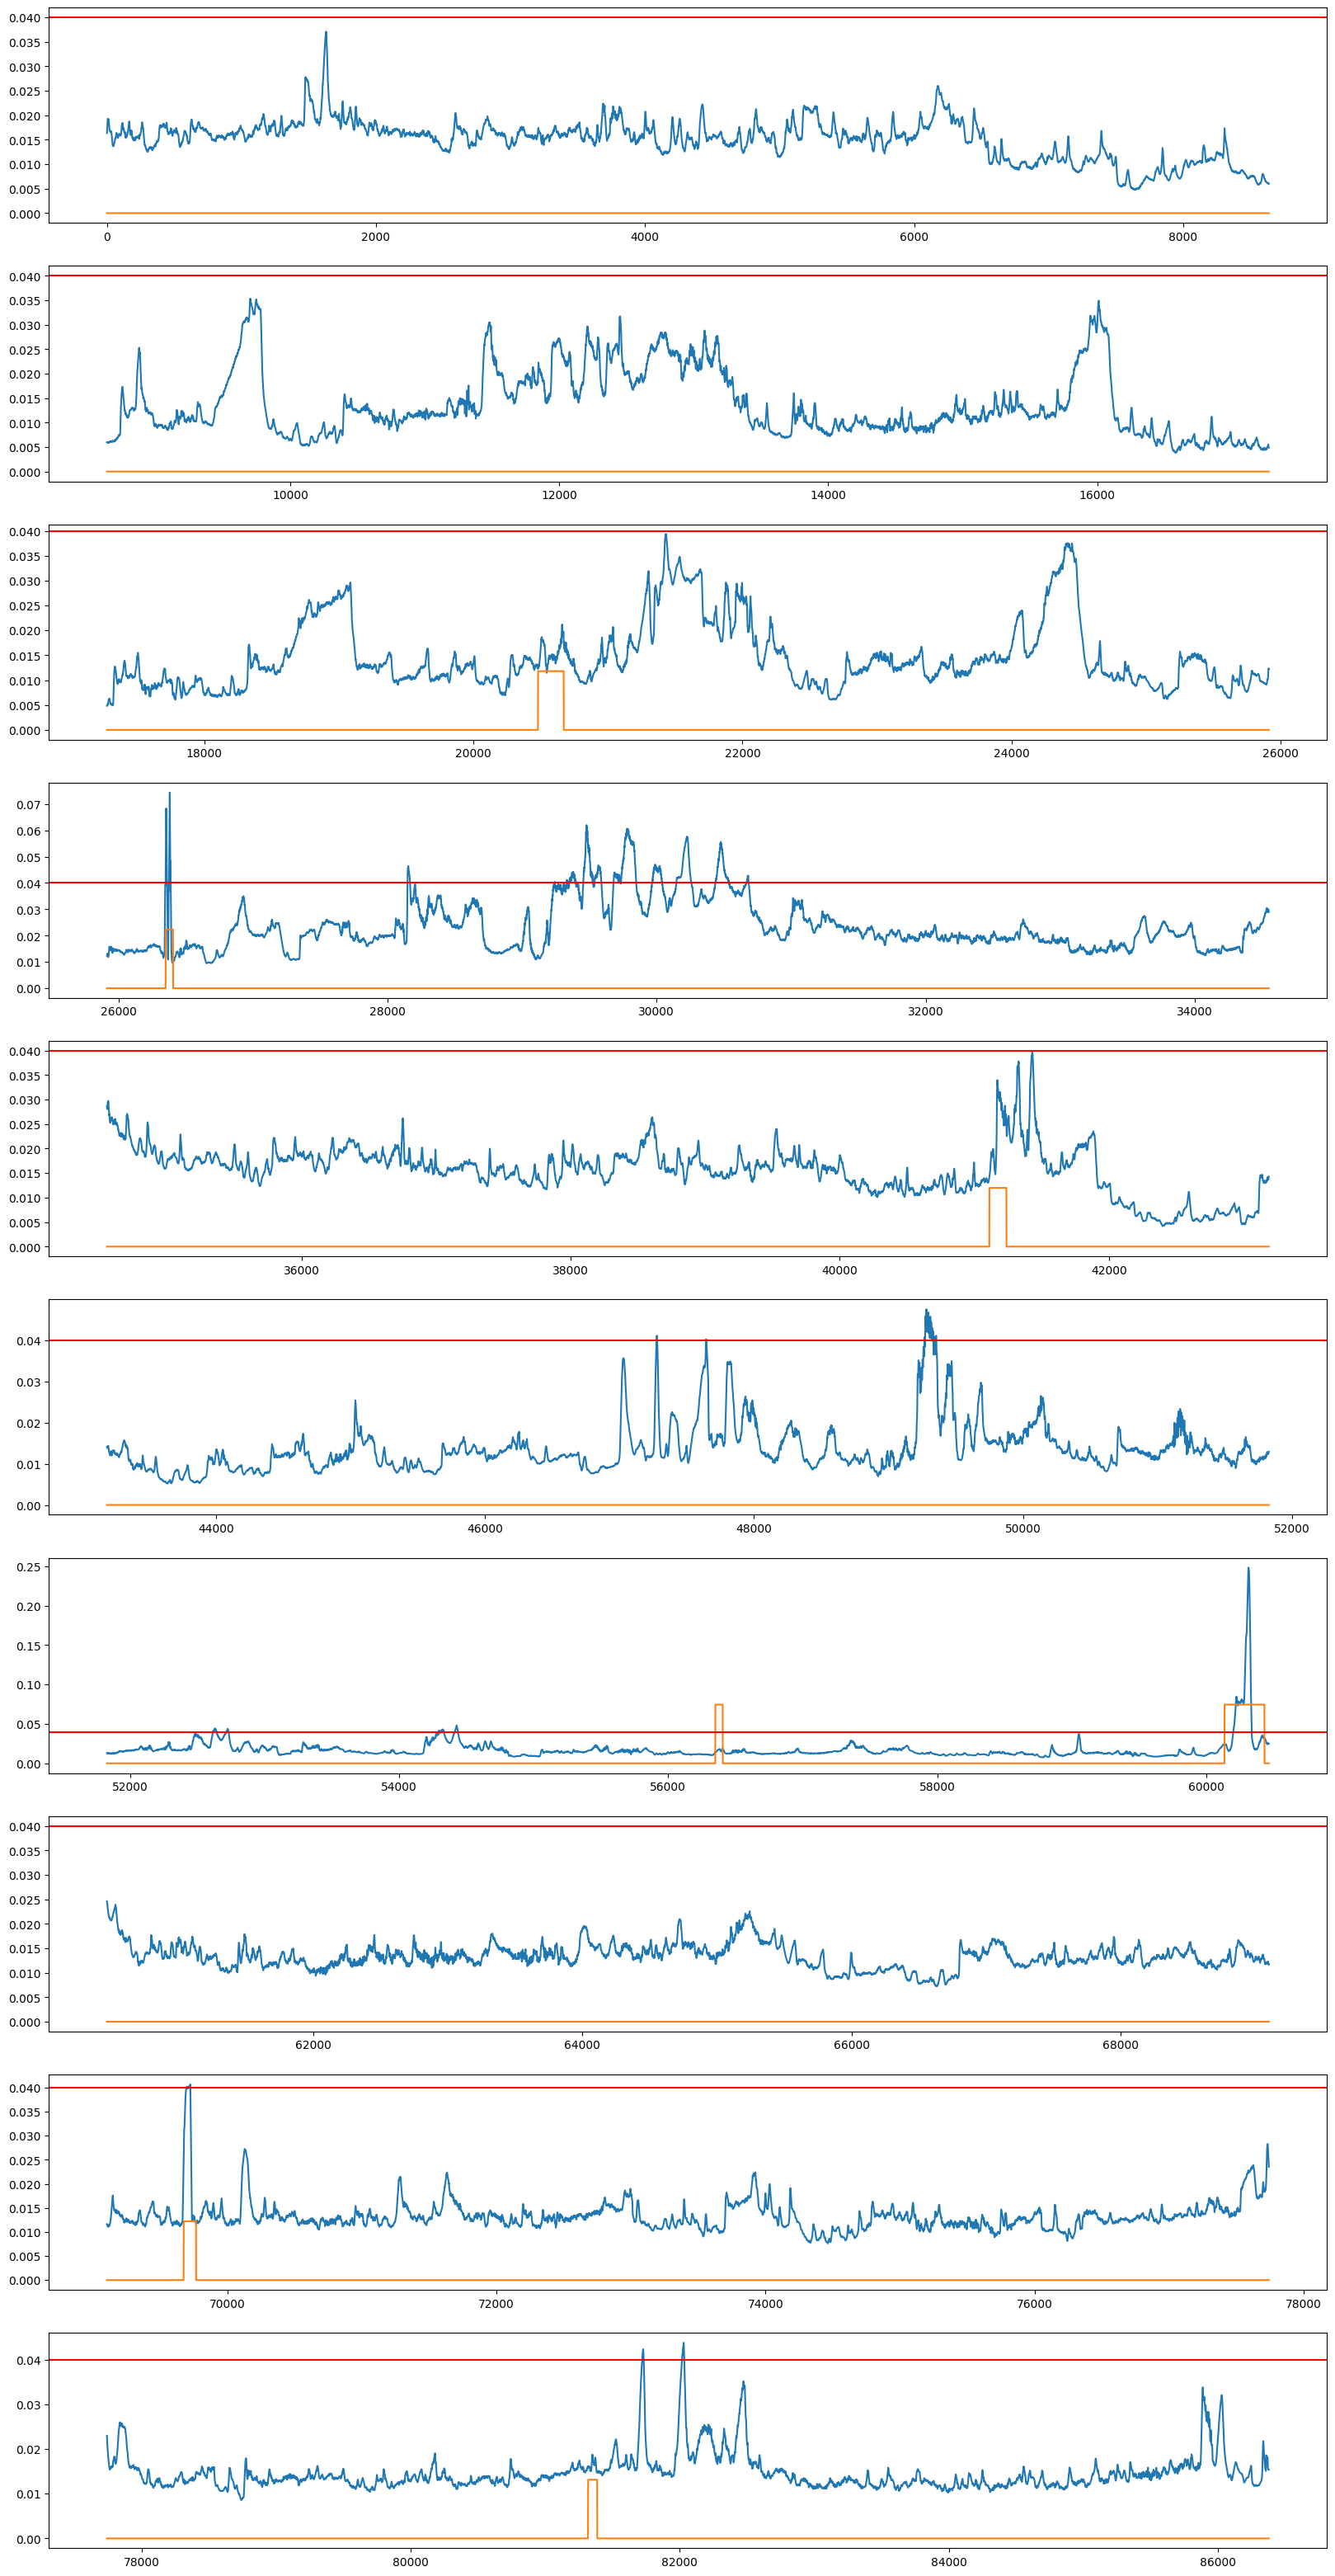

In [ ]:
THRESHOLD = 0.04
check_graph(y_pred, labels, piece=10, THRESHOLD=THRESHOLD)

In [ ]:
def put_labels(distance, threshold):
    xs = np.zeros_like(distance)
    xs[distance > threshold] = 1
    return xs

In [ ]:
LABELS = put_labels(y_pred, THRESHOLD)
LABELS, LABELS.shape

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), (86388,))

In [ ]:
a = np.zeros(window_size)
LABELS = np.append(a, LABELS, axis=0)

In [ ]:
TaPR = etapr.evaluate_haicon(anomalies=labels, predictions=LABELS)
print(f"F1: {TaPR['f1']:.3f} (TaP: {TaPR['TaP']:.3f}, TaR: {TaPR['TaR']:.3f})")
print(f"# of detected anomalies: {len(TaPR['Detected_Anomalies'])}")
print(f"Detected anomalies: {TaPR['Detected_Anomalies']}")

F1: 0.110 (TaP: 0.072, TaR: 0.236)
# of detected anomalies: 3
Detected anomalies: [<TaPR_pkg.DataManage.Range.Range object at 0x7f2a4dffe5e0>, <TaPR_pkg.DataManage.Range.Range object at 0x7f2a7e8eb6a0>, <TaPR_pkg.DataManage.Range.Range object at 0x7f2a4dd6cd90>]
